**Install the Qiskit library**

Qiskit is not a built-in library of python. It should be installed before you use the qiskit tools

In [2]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.2 MB/s eta 0:00:00


**1º Qiskit Classes:**

Qiskit has some classes that help us to manipulate qubits and their respective unitary operarions. One of the classes we first use is the Statevector. Statevector classes is very helpful and implements a qubit (or a quantum state vector, if you prefer). The same class has others methods such *draw()* which is method that write a state vector using LaTex or text notation, *is_valid()* that verifies if the inserted vector is a valid quantum state vector and the *measure()* method that colapse a qubit in superposition into 0 or 1.

In [9]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from numpy import sqrt

ket0 = Statevector([1 + 0j, 0 + 0j])
ket1 = Statevector([0 + 0j, 1 + 0j])
psi = Statevector([1/sqrt(2), 1/sqrt(2)])

H0.draw("latex")

<IPython.core.display.Latex object>

In [10]:
psi.is_valid()

True

In [13]:
psi.measure()

('1',
 Statevector([0.+0.j, 1.+0.j],
             dims=(2,)))

**2º Performing Multiple Measures:**

Since a qubit can be in superposition of 0 and 1, we have probabilities associate with 0 state and 1 state. When we measure a qubit, the superposition collapses and we obtain 0 or 1. If we performe multiples measures, we get statistics of 0 and 1. Since psi have 50% of probability of being 1 and 50% of being 0, we can draw a histogram for the statistics of measuring psi

{'0': 537, '1': 463}

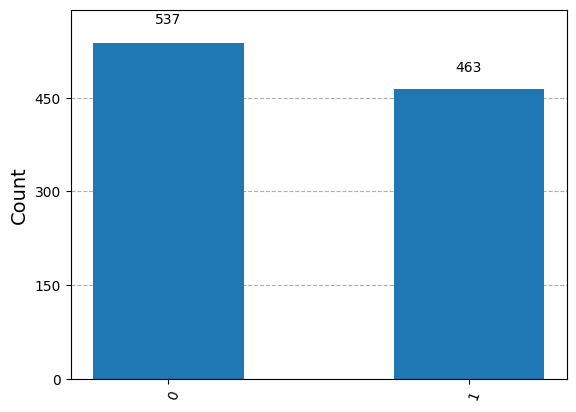

In [14]:
statistics = psi.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

**3º Perfoming Unitary Operations:**

Sometimes, you can think of a unitary operation acting in a qubit in a very similar way that logic gates act on bits. Unitary operators are matrices that multiplies a quantum state vector and chages the quantum state vector. In the cell below, we define some unitary operators using the *Operator* class. We used the method *evolve()* to performe a unitary operation(or a matrix multiplication between unitary operator and a vector, if you preferer).

Here are the name of the operators and their description in quantum state vectors:



1.   **X (NOT gate or Pauli-X)**: This gate is similar to the NOT gate. It transform a 0 vector into 1 vector and a 1 vector into 0 vector.
2.   **Y (Y gate or Pauli-Y):** A single-qubit rotation through π radians around the y-axis.
3.   **Z (Z gate or Pauli-Z):** Can be interpreted as rotation through π radians around the x-axis.
4.   **H (Hadamard gate or Hadamard Operation):** This gate is a special type of quantum gate. The 0 and 1 vectors can be put into superposition with this unitary operation.

In [15]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v.draw("Latex")

<IPython.core.display.Latex object>

**4º Creating a quantum circuit:**

A quantum circuit can be built using the *QuantumCircuit* class. It allow us to define a circuit where we introduce a qubit and perform a series of unitary operations without defining the quantum gates again. Finaly, we use the method *evolve()* to apply the quantum circuit to the a qubit. We do the operations in the cells below.

In [23]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [24]:
# Apllying a circuit in the qubit qubit |0>
v = Statevector([1, 0])
v = v.evolve(circuit)
v.draw("Latex")

<IPython.core.display.Latex object>

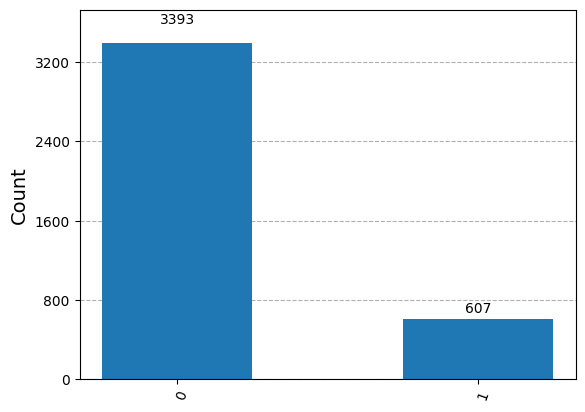

In [25]:
# Perforing multiples measures and drawing a histogram
statistics = v.sample_counts(4000)
plot_histogram(statistics)